In [2]:
import tensorflow as tf
import numpy as np
import os
from PIL import Image

from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.layers.experimental import preprocessing

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from os import listdir
from os.path import isfile, join
import pathlib

<h3>Preprocessing</h3>

<h4>Paths, Input Shape and Labels</h4>

In [9]:
#Choose the data you'll be predicting from.

SLICED_DATA_PATH = listdir('Num_Data/minutes_units')
DATA_PATH = './Num_Data/minutes_units/'

#SLICED_DATA_PATH = listdir('Num_Data/minutes_tens')
#DATA_PATH = './Num_Data/minutes_tens/'

#SLICED_DATA_PATH = listdir('Num_Data/num_units')
#DATA_PATH = './Num_Data/num_units/'

#SLICED_DATA_PATH = listdir('Num_Data/num_tens')
#DATA_PATH = './Num_Data/num_tens/'

SLICED_DATA_PATH = listdir('Labeled_Img')
DATA_PATH = './Labeled_Img/'


NUM_CLASSES = len(SLICED_DATA_PATH)
IMAGES_INPUT = []

In [10]:
for label_class in SLICED_DATA_PATH:
    for image in listdir(DATA_PATH + label_class):
        IMAGES_INPUT.append(join(DATA_PATH+label_class, image))

In [11]:
smallestH = 8000               #Iterates over all images and determines the smallest width and height
smallestW = 8000
for img in IMAGES_INPUT:
    im = Image.open(img)
    width, height = im.size
    if height < smallestH:
        smallestH = height
    if width < smallestW:
        smallestW = width
print(smallestW)
print(smallestH)

47
50


In [12]:
#smallestW = 47
#smallestH = 50

smallestW = 35
smallestH = 28

In [13]:
LABELS = listdir(DATA_PATH)
#Seeing the labels automatically set as the folders name they came from is so beautiful *-*.

In [14]:
aux_glob = pathlib.Path(DATA_PATH)
IMAGE_COUNT = len(list(aux_glob.glob('*/*')))
IMAGE_COUNT

1238

In [15]:
LABELS

['Adaptive_Talons',
 'Adrenal_Glands',
 'Bane',
 'Bane_Nest',
 'Broodlord',
 'Burrow',
 'Carapace_Upgrade',
 'Centrifugal_Hooks',
 'Corruptor',
 'Creep_Tumor',
 'Drone',
 'Dropper_Lord',
 'Evo_Chamber',
 'Extractor',
 'Flyer_Attacks',
 'Flyer_Carapace',
 'Glial_Reconstitution',
 'Great_Spire',
 'Grooved_Spines',
 'Hatch',
 'Hive',
 'Hydra',
 'Hydra_Den',
 'Infestation_Pit',
 'Infestor',
 'Lair',
 'Ling',
 'Lurker',
 'Lurker_Den',
 'Melee_Attacks',
 'Metabolic_Boost',
 'Missile_Attacks',
 'Muscular_Augments',
 'Muta',
 'Neural_Parasite',
 'None',
 'Nydus',
 'Nydus_Activating',
 'Overlord',
 'Overseer',
 'Pathogen_Glands',
 'Pneumatized_Carapace',
 'Queen',
 'Ravager',
 'Roach',
 'Roach_Warren',
 'Seismic_Spines',
 'Spawning_Pool',
 'Spine_Crawler',
 'Spire',
 'Spore_Crawler',
 'Swarm_Host',
 'Viper']

<h4>Dataset Defition</h4>

In [16]:
def get_label(file_path):
  # Convert the path to a list of path components
  parts = tf.strings.split(file_path, os.path.sep)
  
  one_hot = parts[2] == LABELS
  # Integer encode the label
  return one_hot

In [17]:
def decode_img(img):
  # Convert the compressed string to a 3D uint8 tensor
  img = tf.io.decode_jpeg(img, channels=3)
  # Resize the image to the desired size
  return tf.image.resize(img, [smallestH, smallestW])

In [18]:
def process_path(file_path):
  #print(file_path)
  label = get_label(file_path)
  # Load the raw data from the file as a string
  img = tf.io.read_file(file_path)
  img = decode_img(img)
  return img, label

In [28]:
def create_dataset(data_path, batch_size = 2):
    ds = tf.data.Dataset.list_files(data_path, shuffle=False)

    ds = ds.shuffle(buffer_size = IMAGE_COUNT)
    
    
    ds=ds.map(process_path)
    
    normalization_layer = tf.keras.layers.Rescaling(1./255)
    ds = ds.map(lambda x, y: (normalization_layer(x), y))
    ds = ds.batch(batch_size)
    
    
    print(ds.take(1))
    return ds

In [20]:
#IMAGES_INPUT

In [21]:
IMAGE_COUNT

1238

In [22]:
BATCH_SIZE = 8

In [23]:
train_ds= create_dataset(IMAGES_INPUT, BATCH_SIZE)

val_size = int(IMAGE_COUNT * 0.2//BATCH_SIZE)
train_ds = train_ds.skip(val_size)
val_ds = train_ds.take(val_size)

#train_ds = train_ds.shuffle(buffer_size = IMAGE_COUNT*0.8)

<TakeDataset element_spec=(TensorSpec(shape=(None, 28, 35, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 53), dtype=tf.bool, name=None))>


In [27]:
for image_batch, labels_batch in train_ds:
  print("Features - Batch Size, Height, Width and Color Channel: ", image_batch.shape)
  print("Labels - Batch Size and Category One-Hot: ", labels_batch.shape)
  break

Features - Batch Size, Height, Width and Color Channel:  (8, 28, 35, 3)
Labels - Batch Size and Category One-Hot:  (8, 53)


In [25]:
for image, label in train_ds.take(5):
  print()
  print("Image shape: ", image.numpy().shape)
  tf.print("Label: ", label)
#I used this to visualize the one hot, and if it was on correct shape.


Image shape:  (8, 28, 35, 3)
Label:  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Image shape:  (8, 28, 35, 3)
Label:  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Image shape:  (8, 28, 35, 3)
Label:  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Image shape:  (8, 28, 35, 3)
Label:  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Image shape:  (8, 28, 35, 3)
Label:  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [29]:
CLASSES = len(LABELS)
def train_cnn():
    model = models.Sequential([
        #layers.Conv2D(32, (3, 3), activation='relu', input_shape=(smallestW, smallestH, 3), data_format='channels_last'),
        
        #You can see I tried a complex implementation here, but one neuron did the job xD.
        layers.Conv2D(1, 3, activation='relu'),
        #layers.MaxPooling2D((2, 2)),
        
        #layers.Dropout(0.2),
        #layers.Conv2D(128, 3, activation='relu'),
        #layers.MaxPooling2D((2, 2)),
        
        #layers.Dropout(0.2),
        #layers.Conv2D(128, 3, activation='relu'),
        #layers.MaxPooling2D((2, 2)),
        
        #layers.Dropout(0.1),
        #layers.Conv2D(128, 3, activation='relu'),
        #layers.MaxPooling2D((2, 2)),
        
        layers.Flatten(),
        
        #layers.Dense(32, activation='relu'),
        layers.Dense(CLASSES, activation='softmax')
    ])
    
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [30]:
CLASSES

53

In [31]:
model = train_cnn()

In [32]:
EPOCHS = 20

In [34]:
EPOCHS = 12
history = model.fit(
    train_ds,
    epochs = EPOCHS,
    validation_data = val_ds
)


Epoch 1/12
125/125 [==============================] - 1s 6ms/step - loss: 0.0111 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 2/12
125/125 [==============================] - 1s 5ms/step - loss: 0.0232 - accuracy: 0.9960 - val_loss: 0.0107 - val_accuracy: 1.0000
Epoch 3/12
125/125 [==============================] - 1s 5ms/step - loss: 0.0519 - accuracy: 0.9880 - val_loss: 0.0925 - val_accuracy: 0.9667
Epoch 4/12
125/125 [==============================] - 1s 5ms/step - loss: 0.0260 - accuracy: 0.9980 - val_loss: 0.0031 - val_accuracy: 1.0000
Epoch 5/12
125/125 [==============================] - 1s 5ms/step - loss: 0.0088 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 6/12
125/125 [==============================] - 1s 5ms/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 7/12
125/125 [==============================] - 1s 5ms/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 33, 1)         28        
                                                                 
 flatten (Flatten)           (None, 858)               0         
                                                                 
 dense (Dense)               (None, 53)                45527     
                                                                 
Total params: 45,555
Trainable params: 45,555
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.save('minutes_units/')
#model.save('minutes_tens/')

#model.save('cnn_tens/')
#model.save('cnn_units/')

#model.save('cnn_progress/') unit category


#Move it manually to Trained_NNs folder. I've done this separation because I was afraid I could override a working DNN with a test DNN.

INFO:tensorflow:Assets written to: minutes_units/assets


In [55]:
def predict_from_path(image_path):
    image = tf.io.read_file(image_path)
    image = decode_img(image)
    image = image/255.0
    image = tf.expand_dims(image, 0)
    
    
    prediction = model.predict(image)
    raw_pred = prediction
    
    #return raw_pred
    prediction = tf.argmax(prediction[0], axis=-1)
    #Argmax returns the index of the highest value (most probable prediction) in the vector; axis -1 set's it as a scalar.
    
    return prediction

In [64]:
DATA_PATH='./Num_Data/minutes_units/6/'
#Setting a folder manually to check if predictions are working as expected.

In [65]:
sub_path = DATA_PATH
for i in listdir(sub_path):
    #print(i)
    prediction = predict_from_path(sub_path+i)
    print(LABELS[prediction])
    #print(prediction)

6
6
6
6
6
6
6
6
6
6


In [332]:
import matplotlib.pylab as plt
from matplotlib.pyplot import figure

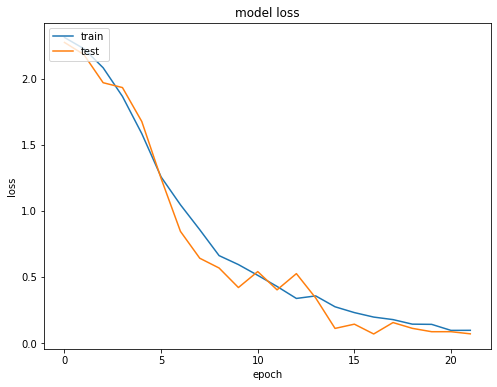

In [383]:
figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

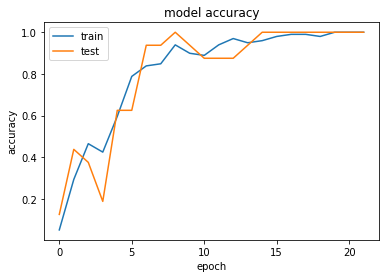

In [384]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()